Loading the pretrained autoencoder

In [1]:
import numpy as np
from tensorflow import keras

pretrained_model = keras.models.load_model('C:/Users/prath/Downloads/initially_trained_autoencoder.h5')

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


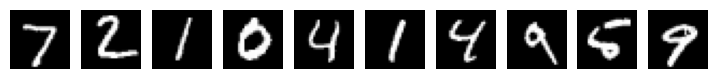

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

Testing on mnist digits

313/313 [==============================] - 1s 3ms/step


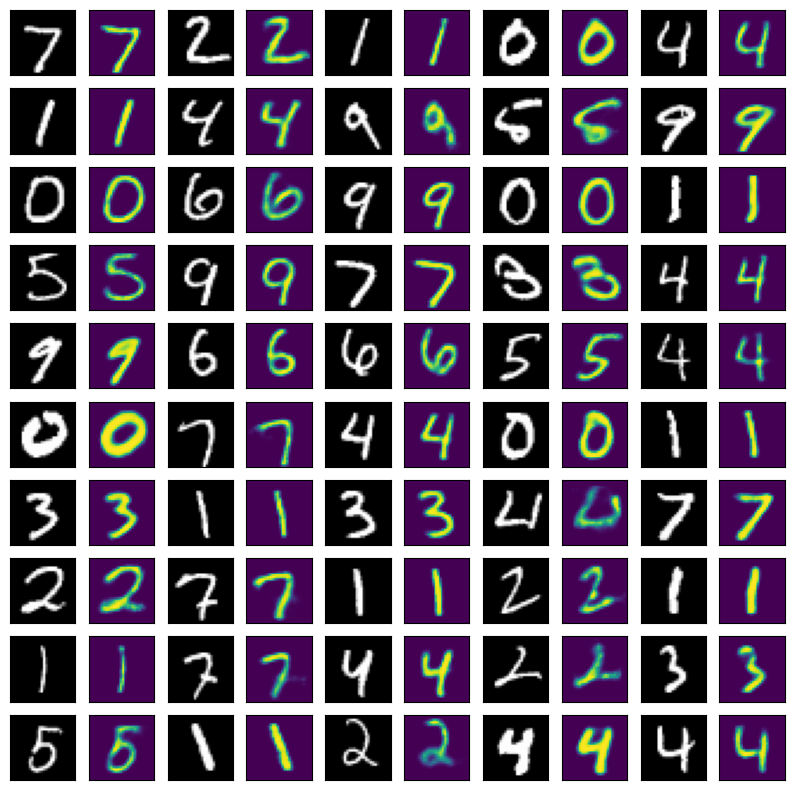

In [4]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

Creating a new autoencoder

In [5]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16# this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [6]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


Training it on mnist data

In [7]:
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)

Epoch 1/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1894 - val_loss: 0.1330
Epoch 2/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1233 - val_loss: 0.1147
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1117 - val_loss: 0.1077
Epoch 4/15
469/469 [==============================] - 7s 15ms/step - loss: 0.1059 - val_loss: 0.1037
Epoch 5/15
469/469 [==============================] - 7s 15ms/step - loss: 0.1027 - val_loss: 0.1014
Epoch 6/15
469/469 [==============================] - 7s 15ms/step - loss: 0.1003 - val_loss: 0.0996
Epoch 7/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0986 - val_loss: 0.0981
Epoch 8/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0972 - val_loss: 0.0972
Epoch 9/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0960 - val_loss: 0.0959
Epoch 10/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0951 - val_lo

Testing on mnist data

313/313 [==============================] - 1s 3ms/step


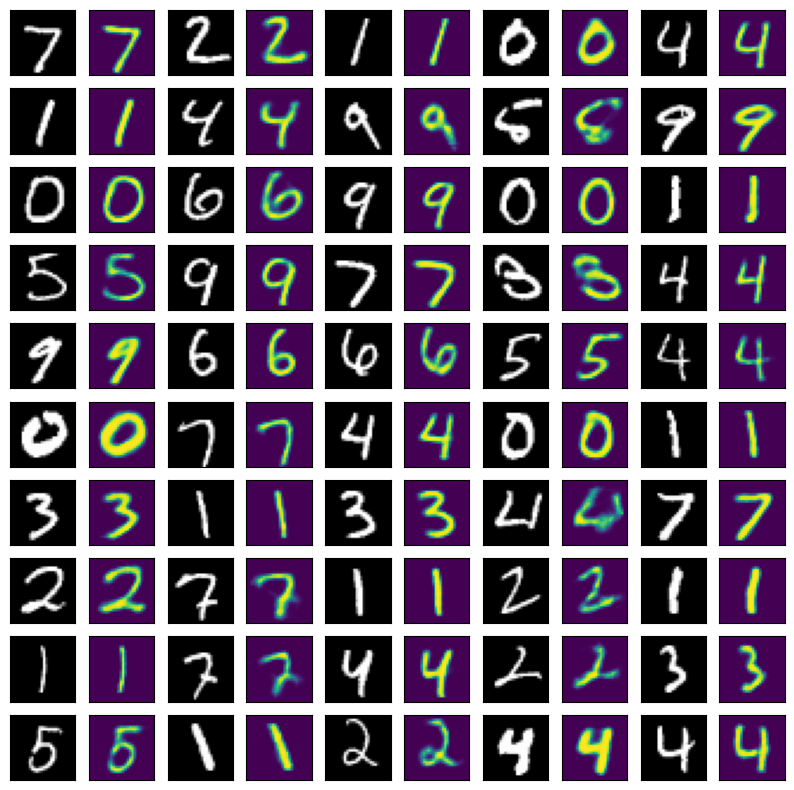

In [8]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

Loading my 5 sample initials

In [9]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import load_img

from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

image_size = (28, 28)

p1= tf.keras.utils.load_img("C:/Users/prath/Downloads/DSP/kleki0.png", target_size=image_size, color_mode = "grayscale")
p2= tf.keras.utils.load_img("C:/Users/prath/Downloads/DSP/kleki1.png", target_size=image_size, color_mode = "grayscale")
p3= tf.keras.utils.load_img("C:/Users/prath/Downloads/DSP/kleki2.png", target_size=image_size, color_mode = "grayscale")
p4= tf.keras.utils.load_img("C:/Users/prath/Downloads/DSP/kleki3.png", target_size=image_size, color_mode = "grayscale")
p5= tf.keras.utils.load_img("C:/Users/prath/Downloads/DSP/kleki4.png", target_size=image_size, color_mode = "grayscale")

images=np.vstack([p1,p2,p3,p4,p5])

input_arr = np.array(images).reshape(5,784) / 255.0
#input_arr = np.array([input_arr]).squeeze()
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it


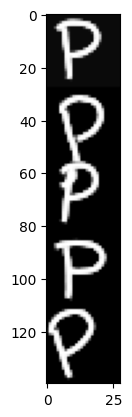

In [10]:
plt.imshow(images, cmap="gray")
ax.axis('off')

plt.show()

In [11]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [12]:
print(input_arr.shape)

(1, 5, 784)


In [13]:
input_arr=input_arr.reshape(-1,784)

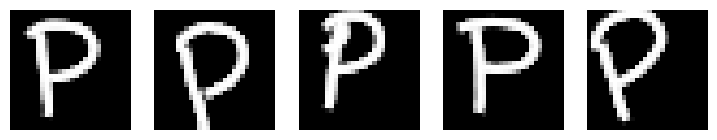

In [14]:
from matplotlib import pyplot as plt

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(input_arr[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [15]:
#input_arr = images[0].reshape(784)


np.random.shuffle(train_images)

bad_images = np.repeat(input_arr, 20, axis=0) #oversampling the letters
new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

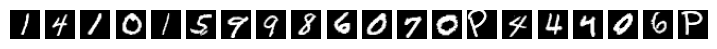

In [16]:
from matplotlib import pyplot as plt

n = 20
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(new_images_test[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

Training on MNIST and initials

In [17]:
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
1/1 [==============================] - 0s 132ms/step - loss: 0.1534 - val_loss: 0.1305
Epoch 2/15
1/1 [==============================] - 0s 56ms/step - loss: 0.1359 - val_loss: 0.1247
Epoch 3/15
1/1 [==============================] - 0s 60ms/step - loss: 0.1280 - val_loss: 0.1219
Epoch 4/15
1/1 [==============================] - 0s 77ms/step - loss: 0.1239 - val_loss: 0.1211
Epoch 5/15
1/1 [==============================] - 0s 72ms/step - loss: 0.1217 - val_loss: 0.1191
Epoch 6/15
1/1 [==============================] - 0s 73ms/step - loss: 0.1176 - val_loss: 0.1177
Epoch 7/15
1/1 [==============================] - 0s 66ms/step - loss: 0.1140 - val_loss: 0.1156
Epoch 8/15
1/1 [==============================] - 0s 56ms/step - loss: 0.1101 - val_loss: 0.1134
Epoch 9/15
1/1 [==============================] - 0s 57ms/step - loss: 0.1059 - val_loss: 0.1120
Epoch 10/15
1/1 [==============================] - 0s 54ms/step - loss: 0.1025 - val_loss: 0.1105
Epoch 11/15
1/1 [===========

Testing on random set of digits and initials

15/15 [==============================] - 0s 4ms/step
(460, 784)


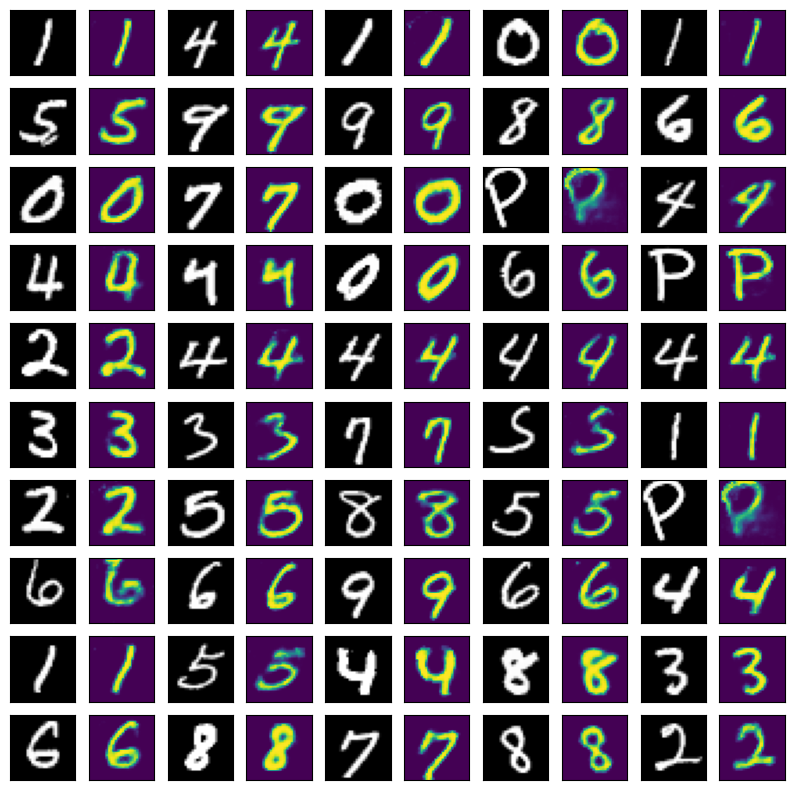

In [18]:
reconstructed_images = autoencoder.predict(new_images_test)
print(reconstructed_images.shape)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

After creating a new autoencoder and training that on mnist digits, I have trained it again with mixed set of digits and my initials so that it won't forget the digits. Oversampled the letters and split the data into training and test data. Looking at the above results it is evident that autoencoder has succeeded in identifying both the digits and my initial.

In [23]:
autoencoder.save('autoencoder.h5')